### In this file, I aim to improve my data science and visualization skills by analyzing data obtained from various sources. All work is done for personal learning purposes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Lets prepare and export "mean iq" and "duration of education" datas

In [2]:
df_iq = pd.read_csv("/kaggle/input/data-sets-that-i-obtained-from-tuik/turkiye_mean_iq_data.csv")

In [3]:
df_iq= df_iq.drop(["Unnamed: 0","Katılımcı Sayısı","IQ Ortalama"],axis=1)

In [4]:
df_iq.rename(columns={"#":"Province Name","İl":"Average IQ"},inplace=True)

In [5]:
df_avg_education_time = pd.read_excel("/kaggle/input/data-sets-that-i-obtained-from-tuik/illere gore ortalama egitim suresi.xltx")
df_avg_education_time.rename(columns={"Province name": "Province Name"}, inplace=True)
df_avg_education_time["Province Name"] = df_avg_education_time["Province Name"].str.strip()
df_avg_education_time

,Province code,Province Name,Total,Males,Females,Gender parity index
0,NaN,Türkiye,9.329045,10.069893,8.604977,0.854525
1,1.0,Adana,9.173226,9.908357,8.462262,0.854053
2,2.0,Adıyaman,8.592518,9.649623,7.526147,0.779942
3,3.0,Afyonkarahisar,8.515203,9.463769,7.592707,0.802292
4,4.0,Ağrı,7.425066,8.758488,5.958352,0.680295
...,...,...,...,...,...,...
77,77.0,Yalova,9.790617,10.428364,9.173359,0.879655
78,78.0,Karabük,9.033651,10.001971,8.092721,0.809113
79,79.0,Kilis,9.275002,9.954195,8.585972,0.862548
80,80.0,Osmaniye,9.106063,9.972291,8.255086,0.827802


In [6]:
avg_iq_and_education_merge = pd.merge(df_iq,df_avg_education_time,on="Province Name",how="outer")

In [7]:
avg_iq_and_education_merge.sort_values("Average IQ",inplace=True)

In [8]:
avg_iq_mean = avg_iq_and_education_merge["Average IQ"].mean()
avg_iq_and_education_merge["Average IQ"].fillna(avg_iq_mean, inplace=True)

/tmp/ipykernel_17/4198491492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  avg_iq_and_education_merge["Average IQ"].fillna(avg_iq_mean, inplace=True)


In [9]:
avg_iq_and_education_merge

,Province Name,Average IQ,Province code,Total,Males,Females,Gender parity index
16,Bingöl,94.190000,12.0,8.939653,9.965271,7.908337,0.793590
62,Siirt,94.520000,56.0,8.514311,10.188770,6.672399,0.654878
32,Hakkari,95.160000,30.0,9.561426,10.560436,8.404215,0.795821
8,Artvin,95.360000,8.0,9.215184,10.219575,8.198701,0.802255
39,Kars,95.840000,36.0,8.341115,9.364240,7.237439,0.772881
...,...,...,...,...,...,...,...
53,Muğla,104.120000,48.0,9.725247,10.099340,9.342238,0.925034
79,İzmir,104.510000,35.0,9.820948,10.292757,9.371000,0.910446
5,Ankara,104.910000,6.0,10.692814,11.327607,10.095191,0.891202
28,Eskişehir,105.200000,26.0,9.995942,10.723148,9.300807,0.867358


In [10]:
avg_iq_and_education_merge[["Average IQ","Gender parity index "]].corr()

,Average IQ,Gender parity index
Average IQ,1.00000,0.66224
Gender parity index,0.66224,1.00000


##### Correlation Results:
This (0.664188) is a positive correlation. It shows that the average IQ level and Gender Parity Index have a moderately strong relationship.

##### Korelasyon Sonuçları: 
Bu (0.664188) pozitif bir korelasyondur. Ortalama iq seviyesi ve toplumsal cinsiyet eşitliği endeksinin orta düzeyde güçlü bir ilişki içersisinde olduğunu gösterir.

### Let's show this data in the graph

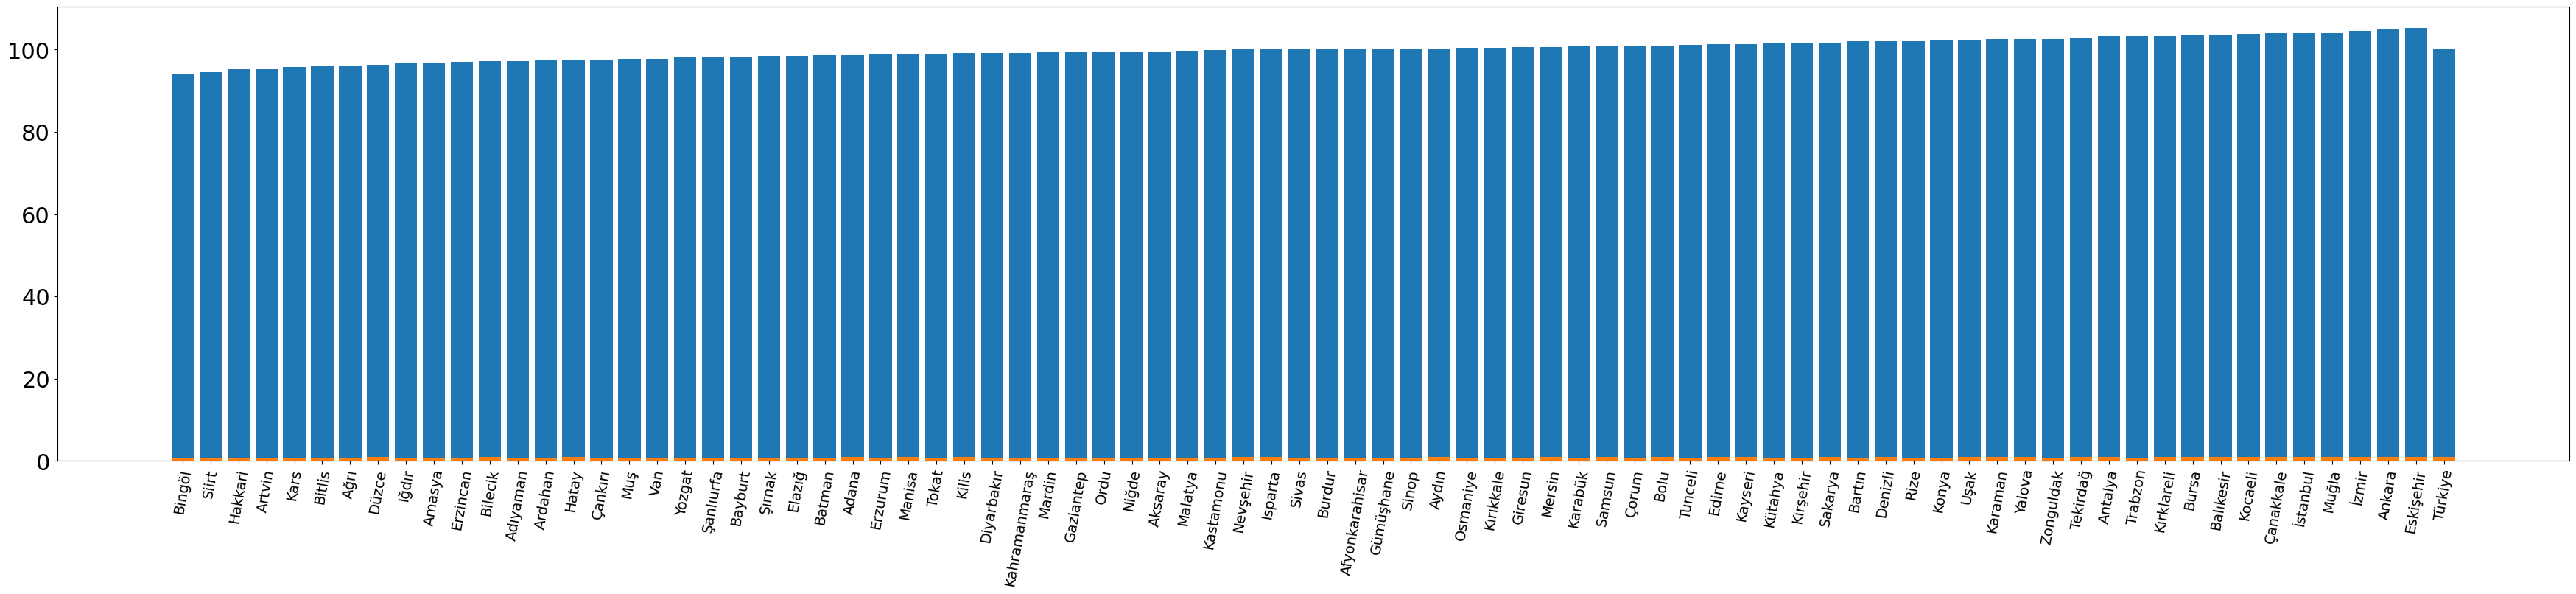

In [11]:
plt.figure(figsize=(44,8))
plt.xticks(fontsize=14, rotation=80)
plt.yticks(fontsize=22)
plt.bar(avg_iq_and_education_merge["Province Name"],avg_iq_and_education_merge["Average IQ"])
plt.bar(avg_iq_and_education_merge["Province Name"],avg_iq_and_education_merge["Gender parity index "])
plt.show()

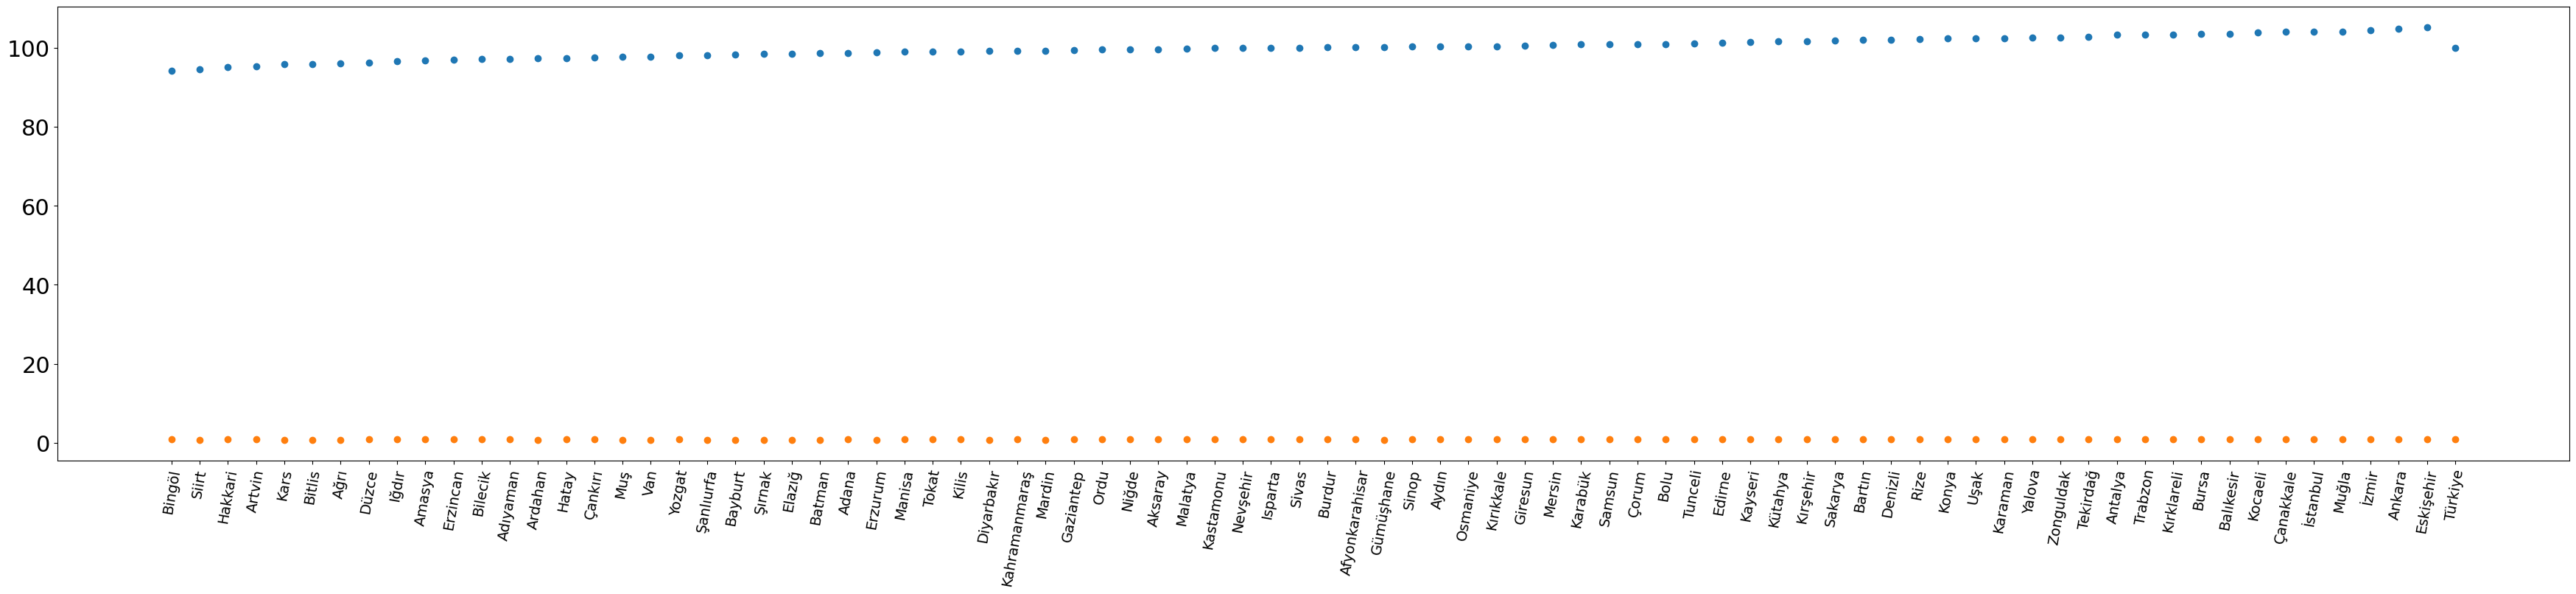

In [12]:
plt.figure(figsize=(44,8))
plt.xticks(fontsize=14, rotation=80)
plt.yticks(fontsize=22)
plt.scatter(avg_iq_and_education_merge["Province Name"],avg_iq_and_education_merge["Average IQ"])
plt.scatter(avg_iq_and_education_merge["Province Name"],avg_iq_and_education_merge["Gender parity index "])
plt.show()

The two graphs above are quite difficult to interpret.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


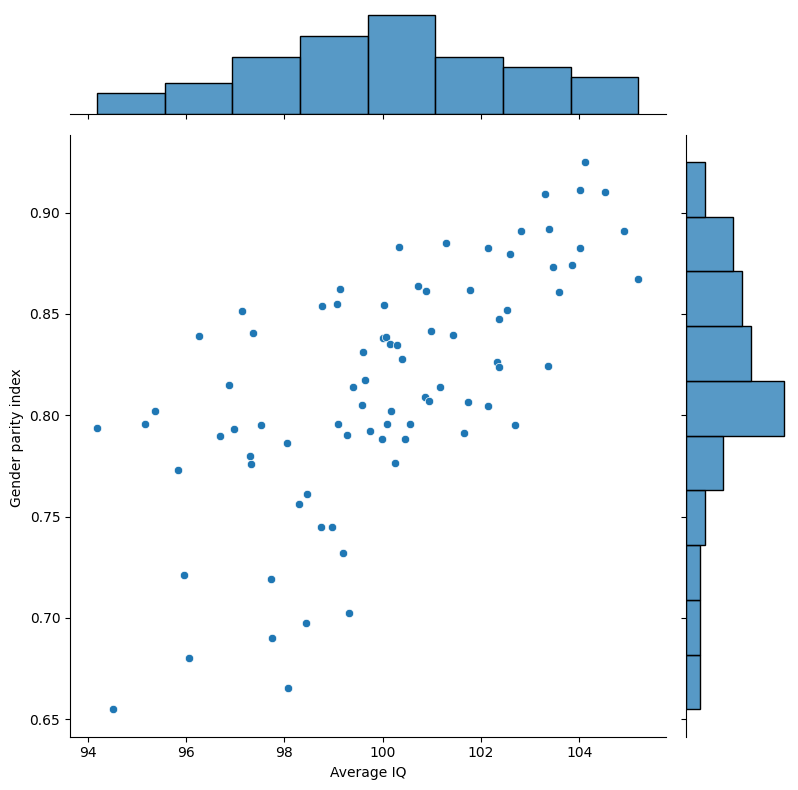

In [13]:
import seaborn as sns

sns.jointplot(
    data=avg_iq_and_education_merge,
    x="Average IQ",
    y="Gender parity index ",
    kind="scatter",
    height=8
)
plt.show()

In this graph we can clearly see the relationship between gpi and avarege iq

## Lets add new dataFrame education levels of Turkiye by provinces !

In [14]:
education_levels_of_turkiye_by_provinces = pd.read_csv("/kaggle/input/turkiye-education-data-by-provinces/clean_data.csv",sep=";")

education_levels_of_turkiye_by_provinces["Year"].fillna(2023,inplace=True)
elotbp = education_levels_of_turkiye_by_provinces

/tmp/ipykernel_17/1023120977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  education_levels_of_turkiye_by_provinces["Year"].fillna(2023,inplace=True)


In [15]:
for col in elotbp.columns:
    if col != "Province Name":
        elotbp[col] = elotbp[col].astype(str).str.replace(' ', '', regex=False)
        elotbp[col] = pd.to_numeric(elotbp[col], errors='coerce')

In [16]:
for col in elotbp.columns[6::3]:
    value = elotbp[col]/elotbp.Total
    loc = elotbp.columns.get_loc(col)

    name = col.split()[1:]
    name.insert(0,"Rate of")
    name = " ".join(name)

    elotbp.insert((loc),name,value)

In [17]:
df1 = df_iq[["Province Name","Average IQ"]]
elotbp_with_iq = pd.merge(elotbp,df1,on="Province Name",how="outer")
elotbp_with_iq

,Year,Province Code,Province Name,Total,Male,Female,Rate of Illiterate,Total Illiterate,Male Illiterate,Female Illiterate,...,Female Universities and Higher Institutions,Rate of Master,Total Master,Male Master,Female Master,Rate of Doctorate,Total Doctorate,Male Doctorate,Female Doctorate,Average IQ
0,2023.0,1,Adana,2072814,1033965,1038849,0.028095,58236,10026,48210,...,150238,0.017390,36046,19173,16873,0.002366,4905,2774,2131,98.76
1,2023.0,2,Adıyaman,543029,275246,267783,0.047817,25966,3941,22025,...,29572,0.012603,6844,4495,2349,0.001342,729,498,231,97.29
2,2023.0,3,Afyonkarahisar,686196,341116,345080,0.019350,13278,2022,11256,...,37915,0.014806,10160,5790,4370,0.002362,1621,1046,575,100.17
3,2023.0,68,Aksaray,387358,192291,195067,0.031010,12012,1598,10414,...,21746,0.015151,5869,3457,2412,0.002422,938,588,350,99.63
4,2023.0,5,Amasya,316138,156312,159826,0.022323,7057,1286,5771,...,21413,0.014968,4732,2701,2031,0.002363,747,451,296,96.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2023.0,19,Çorum,490386,242712,247674,0.035723,17518,3236,14282,...,29221,0.013353,6548,3779,2769,0.002009,985,626,359,100.95
77,2023.0,34,İstanbul,13968646,6964065,7004581,0.015726,219667,35545,184122,...,1421658,0.029375,410325,206127,204198,0.004502,62882,34415,28467,104.02
78,2023.0,35,İzmir,4172061,2066617,2105444,0.011997,50053,10748,39305,...,415149,0.023917,99784,48431,51353,0.004473,18663,9754,8909,104.51
79,2023.0,63,Şanlıurfa,1867101,939156,927945,0.058396,109031,13552,95479,...,64021,0.008982,16770,10619,6151,0.000859,1604,1108,496,98.07


## Let's analyse this cleaned and merged dataset !

In [18]:
elotbp_with_iq[["Rate of Illiterate","Average IQ"]].corr()

,Rate of Illiterate,Average IQ
Rate of Illiterate,1.00000,-0.61661
Average IQ,-0.61661,1.00000


##### Correlation Results:
This (-0.61661) is a negative correlation.
It shows that the average IQ level and literacy rate have a moderate inverse relationship.

##### Korelasyon Sonuçları: 
Bu (-0.61661) negatif bir korelasyondur. 
ortalama iq seviyesi ve  okuma yazma bilme oranının orta düzeyde ters bir ilişkide olduğunu gösterir.


In [19]:
elotbp_with_iq[["Rate of Doctorate","Average IQ"]].corr()

,Rate of Doctorate,Average IQ
Rate of Doctorate,1.000000,0.467656
Average IQ,0.467656,1.000000


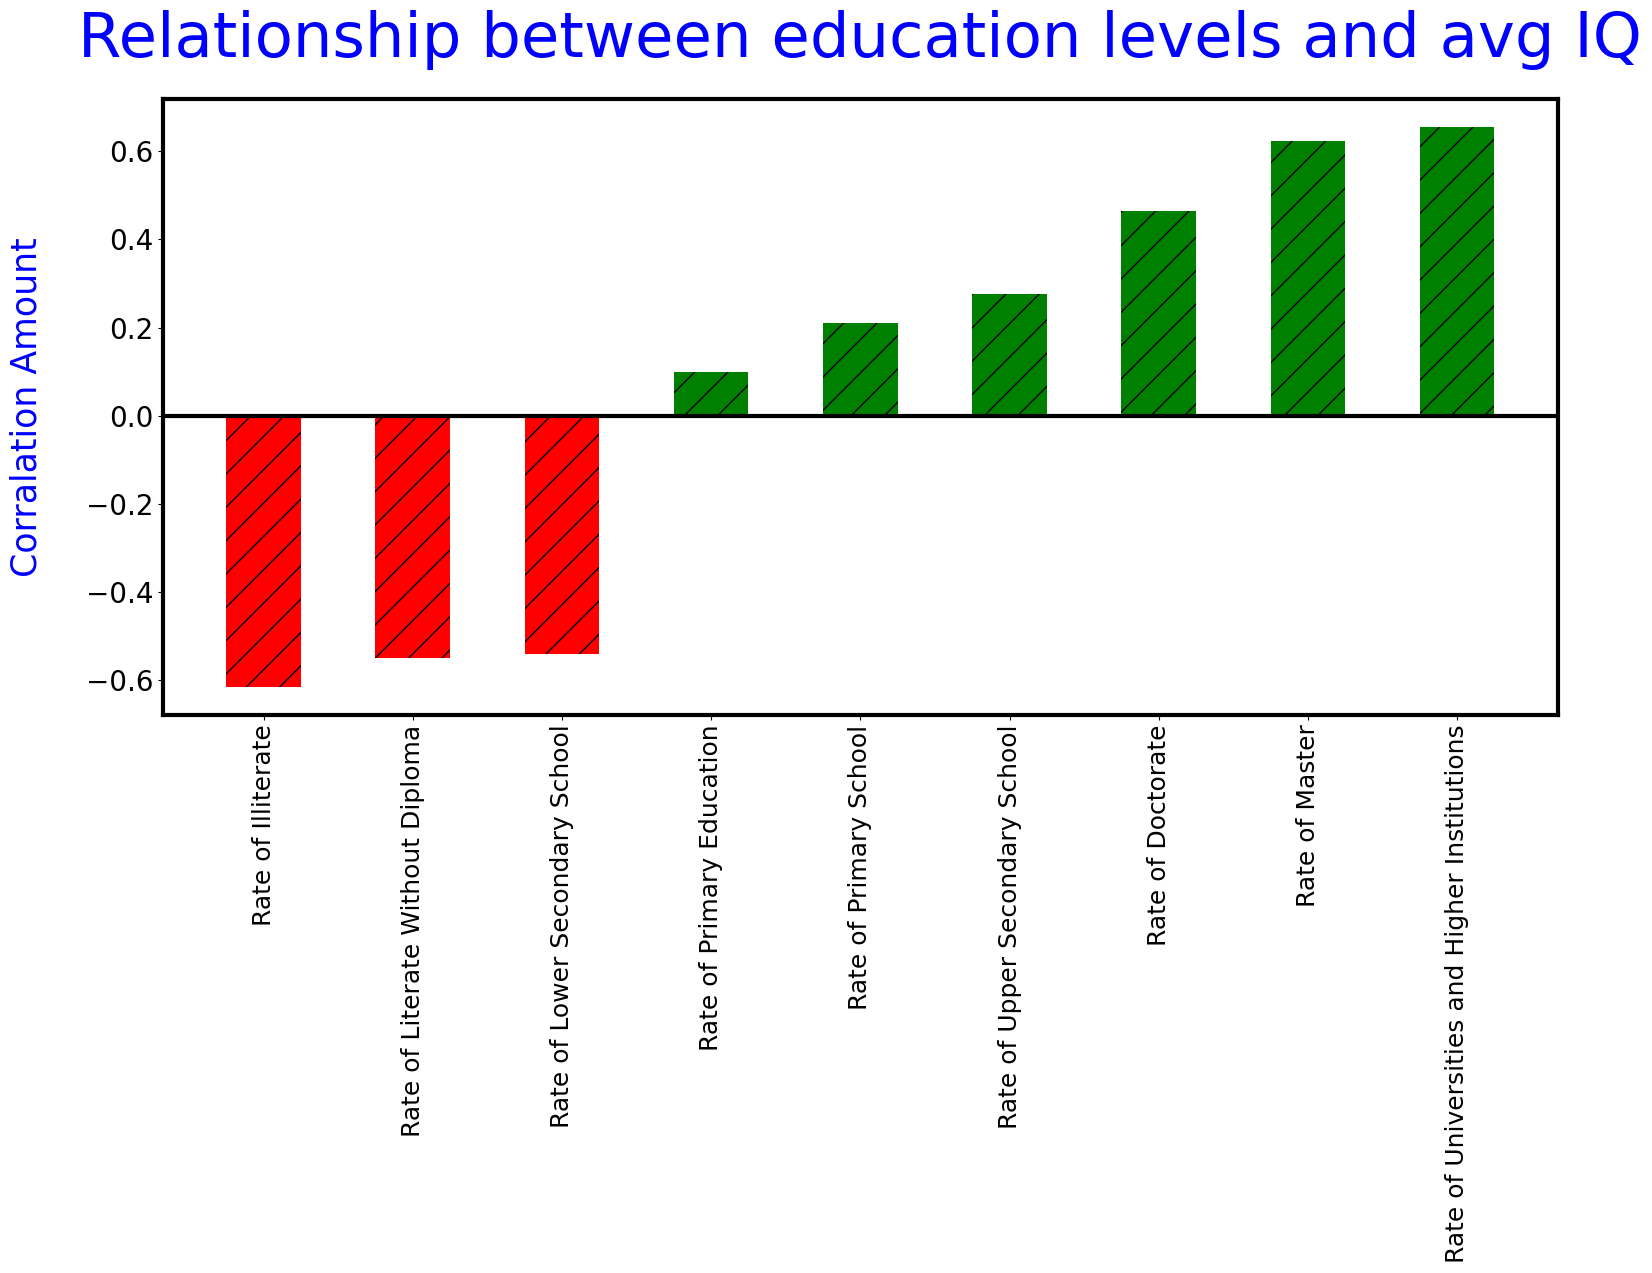

In [20]:
#elotbp_with_iq.iloc[:-1,6:-1:4]
df = elotbp_with_iq.iloc[:-1,6::4].corr()["Average IQ"][:-1]
df.sort_values(inplace=True)

colors = ["green" if val > 0 else "red" for val in df.values]

plt.figure(figsize=(18,8))
plt.bar(df.index, df.values,width=0.5,hatch="/",color=colors)
plt.axhline(y=0, color='black', linewidth=3)  # Çizgi özellikleri
plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=20)

plt.ylabel("Corralation Amount",fontsize=25,labelpad=30.0,color="blue")
plt.title("Relationship between education levels and avg IQ",fontsize=45,pad=30.0,color="blue")

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)
    
plt.show()

## Now we can compare this values with divorce rates

In [21]:
divorce_rates = pd.read_csv("/kaggle/input/data-sets-that-i-obtained-from-tuik/divorce.csv",sep=";")

divorce_rates.rename(columns={"Province":"Province Name","Rate":"Divorce Rate"},inplace=True)
divorce_rates.loc[0, "Province Name"] = "Türkiye"
divorce_rates["Divorce Rate"] = divorce_rates["Divorce Rate"].str.replace(",", ".")
divorce_rates["Divorce Rate"] = pd.to_numeric(divorce_rates["Divorce Rate"])

In [22]:
iq_education_divorce = pd.merge(divorce_rates,elotbp_with_iq,on="Province Name",how="outer")
iq_education_divorce.dropna(inplace=True)

In [23]:
correlation = iq_education_divorce[["Divorce Rate", "Average IQ"]].corr()
correlation

,Divorce Rate,Average IQ
Divorce Rate,1.000000,0.690193
Average IQ,0.690193,1.000000


In [24]:
df1 = avg_iq_and_education_merge[["Province Name","Total","Average IQ"]]
df2 = divorce_rates
iq_edu_duration_divorce_rate = pd.merge(df1,df2, on="Province Name")
iq_edu_duration_divorce_rate.rename(columns={"Total":"Education Duration"},inplace=True)

In [25]:
correlation = iq_edu_duration_divorce_rate.iloc[:,1:].corr()

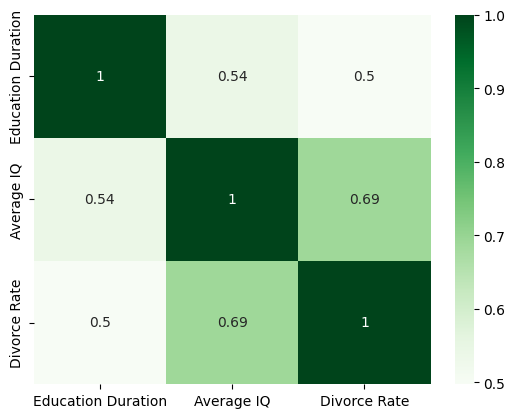

In [26]:
sns.heatmap(correlation,annot=True,cmap="Greens")
plt.show()

<b>This correations shows us there is a strong relationship between iq and divorce rates. Also education duration moderately effects the divorce rates.<b/>